In [1]:
import pandas as pd
import statsmodels.api as sm    

data_1910 = pd.read_parquet("../data/modelling/works_modelling2_1910s.parquet")
data_1920 = pd.read_parquet("../data/modelling/works_modelling2_1920s.parquet")
data_1930 = pd.read_parquet("../data/modelling/works_modelling2_1930s.parquet")
data_1940 = pd.read_parquet("../data/modelling/works_modelling2_1940s.parquet")
data_1950 = pd.read_parquet("../data/modelling/works_modelling2_1950s.parquet")
data_1960 = pd.read_parquet("../data/modelling/works_modelling2_1960s.parquet")
data_1970 = pd.read_parquet("../data/modelling/works_modelling2_1970s.parquet")
data_1980 = pd.read_parquet("../data/modelling/works_modelling2_1980s.parquet")
data_1990 = pd.read_parquet("../data/modelling/works_modelling2_1990s.parquet")
data_2000 = pd.read_parquet("../data/modelling/works_modelling2_2000s.parquet")
data_2010 = pd.read_parquet("../data/modelling/works_modelling2_2010s.parquet")
data_2020 = pd.read_parquet("../data/modelling/works_modelling2_2020s.parquet")

all_top10 = {}
primary_topic_top10 = {}
topic_top10 = {}
other_top10 = {}
lcc_percentiles = {}



# 1910s

In [2]:
df = data_1910.copy()
print(df["year"].min(), df["year"].max())
numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")


df_onehot = pd.get_dummies(df[categorical_cols], prefix=categorical_cols, drop_first=False)


X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




1910 1919
                                                         coef          pval
primary_topic_Beetle Biology and Toxicology Stu...  11.906918  2.872389e-07
primary_topic_Marine Toxins and Detection Methods   10.330661  1.707442e-04
topic_anaphylaxis_anaphylactic                       8.512338  1.553035e-02
primary_topic_Chemical and Physical Studies          7.743716  2.911391e-02
primary_topic_Trauma Hemostasis, Coagulopathy, ...   7.612606  4.593410e-03
...                                                       ...           ...
primary_topic_Flavonoids in Medical Research        -3.786450  4.054832e-01
topic_ethanol_alcohol                               -3.946143  8.986448e-02
topic_anticonvulsant_pentylenetetrazol              -3.983958  3.726340e-01
topic_adenosine_a1                                  -4.328647  7.838997e-02
primary_topic_Venomous Animal Envenomation and ...  -4.444576  2.740343e-01

[308 rows x 2 columns]
                            OLS Regression Results    

In [3]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Beetle Biology and Toxicology Stu...  11.906918  2.277667   
primary_topic_Marine Toxins and Detection Methods   10.330661  2.720421   
primary_topic_Chemical and Physical Studies          7.743716  3.535228   
primary_topic_Trauma Hemostasis, Coagulopathy, ...   7.612606  2.669596   
primary_topic_Inorganic and Organometallic Chem...   7.049801  2.568322   
...                                                       ...       ...   
primary_topic_Helminth infection and control        -3.512359  2.277667   
primary_topic_Genetic and Kidney Cyst Diseases      -3.601292  3.016148   
primary_topic_Berberine and alkaloids research      -3.628188  2.183665   
primary_topic_Flavonoids in Medical Research        -3.786450  4.546552   
primary_topic_Venomous Animal Envenomation and ...  -4.444576  4.057341   

                                                            pval

In [4]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                            coef   std_err      pval  \
topic_anaphylaxis_anaphylactic          8.512338  3.501584  0.015530   
topic_venom_snake                       6.346075  3.680175  0.085470   
topic_vas_deferens                      6.284458  2.927921  0.032490   
topic_histamine_h1                      4.087531  2.195493  0.063424   
topic_digitalis_glycosides              3.946658  1.689596  0.020031   
...                                          ...       ...       ...   
topic_absorption_intestinal            -3.272012  2.649446  0.217620   
topic_copper_thiosemicarbazonato       -3.272905  4.430490  0.460542   
topic_ethanol_alcohol                  -3.946143  2.320502  0.089864   
topic_anticonvulsant_pentylenetetrazol -3.983958  4.463168  0.372634   
topic_adenosine_a1                     -4.328647  2.452521  0.078390   

                                           [0.025     0.975]  
topic_anaphylaxis_anaphylactic           1.62

In [5]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                              coef       std_err      pval  \
countries_distinct_count              1.626723e+00  4.084322e+00  0.690650   
mean_past_mncs_institutions           1.626723e+00  4.084322e+00  0.690650   
institutions_distinct_count           1.626723e+00  4.084322e+00  0.690650   
mean_past_contributions_institutions  8.296089e-14  8.037715e-13  0.917848   
referenced_works_count               -4.804996e-12  4.259018e-12  0.259967   
age                                  -2.116902e-02  1.131988e-01  0.851757   
mean_past_mncs_authors               -1.408386e-01  8.135378e-02  0.084250   
authors_count                        -2.143722e-01  2.451470e-01  0.382431   
mean_past_contributions_authors      -3.540438e-01  9.863678e-02  0.000376   

                                            [0.025        0.975]  
countries_distinct_count             -6.404601e+00  9.658046e+00  
mean_past_mncs_institutions          -6.404601e+

In [6]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1910"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1910"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1910"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1910"] = top10

lcc_percentiles["1910"] = model_sm.rsquared * 100

other_top10

{'1910': {'mean_past_contributions_authors': {'coef': -0.3540437599724615,
   'pval': 0.0003759869373180152}}}

# 1920s

In [7]:
df = data_1920.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())



                                                         coef          pval
primary_topic_Infant Health and Development         14.838537  2.668484e-17
primary_topic_Neurological Complications and Sy...  14.792155  1.951236e-14
primary_topic_Neuroscience Education and Cognit...  14.022889  9.948025e-16
topic_cocaine_coca                                  13.327948  4.627170e-31
topic_asthma_bronchodilator                         10.251913  9.291322e-10
...                                                       ...           ...
primary_topic_Child Nutrition and Water Access      -4.485675  2.278356e-02
topic_anticonvulsant_pentylenetetrazol              -4.967250  6.514761e-03
topic_trachea_airway                                -5.327248  1.850685e-03
topic_cocaine_norepinephrine                        -7.632683  4.903104e-05
topic_cyanide_poisoning                            -10.216000  8.647761e-04

[427 rows x 2 columns]
                            OLS Regression Results              

In [8]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Infant Health and Development         14.838537  1.704949   
primary_topic_Neurological Complications and Sy...  14.792155  1.888319   
primary_topic_Neuroscience Education and Cognit...  14.022889  1.702860   
primary_topic_Cassava research and cyanide           9.693218  2.605463   
primary_topic_Antimicrobial agents and applicat...   9.015066  3.530120   
...                                                       ...       ...   
primary_topic_Bone fractures and treatments         -2.938093  1.953111   
primary_topic_Sympathectomy and Hyperhidrosis T...  -2.961816  2.061868   
primary_topic_Clostridium difficile and Clostri...  -3.551258  1.914031   
primary_topic_Immune Response and Inflammation      -3.698049  2.432528   
primary_topic_Child Nutrition and Water Access      -4.485675  1.965247   

                                                            pval

In [9]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                             coef   std_err          pval  \
topic_cocaine_coca                      13.327948  1.090341  4.627170e-31   
topic_asthma_bronchodilator             10.251913  1.649998  9.291322e-10   
topic_ephedrine_epinephrine              7.853611  0.915991  7.360807e-17   
topic_dialysis_peritoneal                7.643491  1.728385  1.145251e-05   
topic_histamine_h1                       6.930564  1.233602  2.868992e-08   
...                                           ...       ...           ...   
topic_chemotherapy_cancer               -4.316323  1.929700  2.564029e-02   
topic_anticonvulsant_pentylenetetrazol  -4.967250  1.819812  6.514761e-03   
topic_trachea_airway                    -5.327248  1.704112  1.850685e-03   
topic_cocaine_norepinephrine            -7.632683  1.867188  4.903104e-05   
topic_cyanide_poisoning                -10.216000  3.052450  8.647761e-04   

                                           [0.02

In [10]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                              coef       std_err  \
mean_past_mncs_authors                3.525564e-01  4.913815e-02   
authors_count                         2.052276e-01  1.203218e-01   
age                                   7.726517e-02  4.369070e-02   
mean_past_contributions_institutions -5.929722e-12  1.774017e-12   
referenced_works_count               -2.487138e-01  1.620518e+00   
mean_past_contributions_authors      -3.747630e-01  8.697961e-02   
countries_distinct_count             -2.049570e+00  1.445806e+00   
mean_past_mncs_institutions          -2.049570e+00  1.445806e+00   
institutions_distinct_count          -2.049570e+00  1.445806e+00   

                                              pval        [0.025        0.975]  
mean_past_mncs_authors                1.989397e-12  2.560669e-01  4.490459e-01  
authors_count                         8.855222e-02 -3.104086e-02  4.414960e-01  
age                                   7

In [11]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1920"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1920"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1920"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1920"] = top10

lcc_percentiles["1920"] = model_sm.rsquared * 100


# 1930s

In [12]:
df = data_1930.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef          pval
primary_topic_Cardiomyopathy and Myosin Studies     19.265999  3.571092e-21
primary_topic_Selenium in Biological Systems        12.265918  2.899731e-17
topic_cocaine_coca                                   9.369861  7.305637e-07
primary_topic_Research on Leishmaniasis Studies      6.598201  2.760520e-02
primary_topic_Radioactivity and Radon Measurements   6.521661  4.293032e-03
...                                                       ...           ...
primary_topic_Ocular and Laser Science Research     -4.038070  1.000039e-01
topic_fluoroacetate_fbal                            -4.098704  1.533971e-01
topic_trypanosoma_cruzi                             -4.700296  3.418549e-02
topic_selenium_selenite                             -8.237556  6.200736e-06
topic_placental_pregnancy                           -9.085007  8.461053e-02

[498 rows x 2 columns]
                            OLS Regression Results              

In [13]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Cardiomyopathy and Myosin Studies     19.265999  1.997270   
primary_topic_Selenium in Biological Systems        12.265918  1.427117   
primary_topic_Research on Leishmaniasis Studies      6.598201  2.991223   
primary_topic_Radioactivity and Radon Measurements   6.521661  2.278803   
primary_topic_Peroxisome Proliferator-Activated...   5.989163  1.588080   
...                                                       ...       ...   
primary_topic_Shakespeare Adaptation, and Liter...  -1.945623  2.785305   
primary_topic_Potato Plant Research                 -2.371640  2.140395   
primary_topic_Radiation Therapy and Dosimetry       -2.606001  3.180900   
primary_topic_Sensor Technology and Measurement...  -4.023957  3.199853   
primary_topic_Ocular and Laser Science Research     -4.038070  2.452885   

                                                            pval

In [14]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                     coef   std_err          pval     [0.025  \
topic_cocaine_coca               9.369861  1.880509  7.305637e-07   5.679977   
topic_adenosine_adenylate        6.039846  1.779104  7.116584e-04   2.548936   
topic_hydralazine_hydrazine      4.915645  2.177237  2.416155e-02   0.643529   
topic_phenylethylamine_biogenic  3.953485  1.189691  9.201733e-04   1.619104   
topic_ephedrine_epinephrine      3.584467  1.450966  1.365047e-02   0.737421   
...                                   ...       ...           ...        ...   
topic_mode_natruretic           -2.821904  1.279578  2.764139e-02  -5.332658   
topic_fluoroacetate_fbal        -4.098704  2.868947  1.533971e-01  -9.728075   
topic_trypanosoma_cruzi         -4.700296  2.216512  3.418549e-02  -9.049477   
topic_selenium_selenite         -8.237556  1.813623  6.200736e-06 -11.796199   
topic_placental_pregnancy       -9.085007  5.263209  8.461053e-02 -19.412335   

            

In [15]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                              coef       std_err  \
referenced_works_count                4.316556e+00  2.253169e+00   
authors_count                         2.377593e-01  8.351729e-02   
age                                   9.811864e-02  3.456559e-02   
mean_past_mncs_authors                1.273796e-03  3.429198e-02   
mean_past_contributions_institutions -6.980600e-13  4.277234e-13   
mean_past_contributions_authors      -5.941791e-01  9.965820e-02   
institutions_distinct_count          -2.608998e+00  1.028843e+00   
countries_distinct_count             -2.608998e+00  1.028843e+00   
mean_past_mncs_institutions          -2.608998e+00  1.028843e+00   

                                              pval        [0.025        0.975]  
referenced_works_count                5.565931e-02 -1.045526e-01  8.737665e+00  
authors_count                         4.499722e-03  7.388393e-02  4.016347e-01  
age                                   4

In [16]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1930"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1930"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1930"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1930"] = top10

lcc_percentiles["1930"] = model_sm.rsquared * 100


# 1940s

In [17]:
df = data_1940.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                          coef           pval
topic_curves_dose                                   160.337984  2.422875e-230
topic_pain_questionnaire                            124.066797  1.542999e-228
topic_diuretic_diuretics                             13.076998   2.640478e-10
primary_topic_Carcinogens and Genotoxicity Asse...   12.724040   1.202547e-26
topic_analgesic_postoperative                         8.042608   7.260942e-10
...                                                        ...            ...
topic_avoidance_maze                                 -4.120417   3.043160e-01
topic_chiral_stereochemistry                         -4.157073   2.981860e-01
topic_interferon_interferons                         -4.482055   1.385514e-01
topic_creatine_phosphokinase                         -5.891813   2.296863e-02
primary_topic_Metabolomics and Mass Spectrometr...  -15.657995   6.656765e-05

[601 rows x 2 columns]
                            OLS Regressi

In [18]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Carcinogens and Genotoxicity Asse...  12.724040  1.164300   
primary_topic_Regulation of Appetite and Obesity     6.424513  3.152617   
primary_topic_Magnetic and Electromagnetic Effects   5.942986  4.057170   
primary_topic_Arsenic contamination and mitigation   5.865251  2.305152   
primary_topic_Thyroid Disorders and Treatments       4.859751  1.582741   
...                                                       ...       ...   
primary_topic_Pituitary Gland Disorders and Tre...  -3.592147  3.161352   
primary_topic_Growth Hormone and Insulin-like G...  -3.596441  2.440467   
primary_topic_Synthesis of Tetrazole Derivatives    -3.727632  2.391246   
primary_topic_Click Chemistry and Applications      -3.810856  3.590495   
primary_topic_Metabolomics and Mass Spectrometr... -15.657995  3.913141   

                                                            pval

In [19]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                        coef   std_err           pval  \
topic_curves_dose                 160.337984  3.977389  2.422875e-230   
topic_pain_questionnaire          124.066797  3.095538  1.542999e-228   
topic_diuretic_diuretics           13.076998  2.053165   2.640478e-10   
topic_analgesic_postoperative       8.042608  1.295673   7.260942e-10   
topic_quinidine_dihydroquinidine    5.732757  2.050842   5.262005e-03   
...                                      ...       ...            ...   
topic_influenza_ribavirin          -4.114047  2.965684   1.656162e-01   
topic_avoidance_maze               -4.120417  4.009620   3.043160e-01   
topic_chiral_stereochemistry       -4.157073  3.994294   2.981860e-01   
topic_interferon_interferons       -4.482055  3.024067   1.385514e-01   
topic_creatine_phosphokinase       -5.891813  2.587886   2.296863e-02   

                                      [0.025      0.975]  
topic_curves_dose                 152

In [20]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                              coef       std_err      pval  \
mean_past_mncs_institutions           1.695528e-01  1.185891e+00  0.886332   
countries_distinct_count              1.695528e-01  1.185891e+00  0.886332   
institutions_distinct_count           1.695528e-01  1.185891e+00  0.886332   
mean_past_mncs_authors                3.972343e-02  7.069508e-02  0.574283   
age                                   3.598852e-02  4.423215e-02  0.416009   
referenced_works_count                2.158656e-03  1.864963e-01  0.990767   
mean_past_contributions_institutions  6.942653e-13  2.097746e-12  0.740730   
authors_count                        -8.879373e-02  8.087534e-02  0.272450   
mean_past_contributions_authors      -3.959020e-01  1.094476e-01  0.000309   

                                            [0.025        0.975]  
mean_past_mncs_institutions          -2.156942e+00  2.496048e+00  
countries_distinct_count             -2.156942e+

In [21]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1940"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1940"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1940"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1940"] = top10

lcc_percentiles["1940"] = model_sm.rsquared * 100


# 1950s

In [22]:
df = data_1950.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef          pval
topic_curves_dose                                   79.948654  4.321007e-16
primary_topic_Musculoskeletal pain and rehabili...  50.162273  5.429326e-16
topic_pain_questionnaire                            50.162273  5.429326e-16
topic_lithium_carbonate                             20.493025  5.326787e-08
primary_topic_Nausea and vomiting management        19.836803  1.870667e-11
...                                                       ...           ...
primary_topic_Rare-earth and actinide compounds     -9.987851  2.530970e-02
primary_topic_Pulmonary Hypertension Research a... -11.746324  1.903083e-03
primary_topic_Chalcogenide Semiconductor Thin F... -12.739452  2.931143e-02
primary_topic_History and advancements in chemi... -12.975763  7.023600e-03
primary_topic_Material Properties and Applications -13.705631  9.782101e-04

[707 rows x 2 columns]
                            OLS Regression Results              

In [23]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Musculoskeletal pain and rehabili...  50.162273  6.131157   
primary_topic_Nausea and vomiting management        19.836803  2.933756   
primary_topic_Neonatal Respiratory Health Research  11.746016  2.934350   
primary_topic_Inhalation and Respiratory Drug D...  10.029063  2.460979   
primary_topic_GABA and Rice Research                 5.392538  2.985851   
...                                                       ...       ...   
primary_topic_Rare-earth and actinide compounds     -9.987851  4.461613   
primary_topic_Pulmonary Hypertension Research a... -11.746324  3.777171   
primary_topic_Chalcogenide Semiconductor Thin F... -12.739452  5.840794   
primary_topic_History and advancements in chemi... -12.975763  4.807611   
primary_topic_Material Properties and Applications -13.705631  4.150099   

                                                            pval

In [24]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                         coef   std_err          pval  \
topic_curves_dose                   79.948654  9.737864  4.321007e-16   
topic_pain_questionnaire            50.162273  6.131157  5.429326e-16   
topic_lithium_carbonate             20.493025  3.750133  5.326787e-08   
topic_lung_paraquat                 16.546442  2.428732  1.324188e-11   
topic_catecholamines_catecholamine  14.562828  1.740002  1.192292e-16   
...                                       ...       ...           ...   
topic__                             -4.445596  1.548679  4.147995e-03   
topic_porphyrin_porphyria           -4.697205  3.233966  1.465584e-01   
topic_years_                        -4.725761  0.894163  1.418524e-07   
topic_mitochondria_mitochondrial    -5.349257  2.294898  1.987324e-02   
topic_mesenteric_arteries           -5.606066  2.321610  1.585175e-02   

                                       [0.025     0.975]  
topic_curves_dose                   6

In [25]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err      pval    [0.025  \
institutions_distinct_count           0.881157  0.687667  0.200238 -0.467606   
mean_past_mncs_institutions           0.642013  0.249190  0.010067  0.153262   
mean_past_mncs_authors                0.229460  0.060917  0.000171  0.109979   
countries_distinct_count              0.123137  1.777853  0.944790 -3.363874   
age                                   0.011640  0.039202  0.766568 -0.065250   
referenced_works_count               -0.024487  0.027013  0.364794 -0.077469   
authors_count                        -0.048944  0.063625  0.441847 -0.173736   
mean_past_contributions_institutions -0.089451  0.119799  0.455363 -0.324421   
mean_past_contributions_authors      -0.546852  0.159542  0.000623 -0.859770   

                                        0.975]  
institutions_distinct_count           2.229919  
mean_past_mncs_institutions           1.130765  
mean_past_mncs_

In [26]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1950"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1950"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1950"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1950"] = top10

lcc_percentiles["1950"] = model_sm.rsquared * 100


# 1960s

In [27]:
df = data_1960.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())



                                                         coef          pval
topic_curves_dose                                   43.661894  4.025508e-14
topic_hydroxydopamine_intraventricular              36.925897  1.489493e-11
topic_cyclase_adenylate                             27.061319  2.534058e-18
primary_topic_Shoulder Injury and Treatment         26.073868  3.868221e-13
topic_pain_questionnaire                            26.073868  3.868221e-13
...                                                       ...           ...
topic_propranolol_hydroxypropranolol                -4.603702  2.359447e-01
topic_ascites_ehrlich                               -4.898746  3.186600e-04
primary_topic_Immunotoxicology and immune respo...  -5.859667  1.554653e-01
topic_striatum_striatal                             -7.544429  1.804822e-01
primary_topic_Infant Development and Preterm Care  -36.959776  1.870002e-06

[1302 rows x 2 columns]
                            OLS Regression Results             

In [28]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Shoulder Injury and Treatment         26.073868  3.585396   
primary_topic_Gene Regulatory Network Analysis      24.590906  5.717527   
primary_topic_Sleep and related disorders           20.499171  4.074810   
primary_topic_Biological Stains and Phytochemicals  13.185451  5.482967   
primary_topic_Leprosy Research and Treatment         7.930790  3.891642   
...                                                       ...       ...   
primary_topic_Polyoxometalates: Synthesis and A...  -3.737151  5.483105   
primary_topic_Autophagy in Disease and Therapy      -3.882059  5.779428   
primary_topic_Parasites and Host Interactions       -4.420097  3.628372   
primary_topic_Immunotoxicology and immune respo...  -5.859667  4.124718   
primary_topic_Infant Development and Preterm Care  -36.959776  7.747554   

                                                            pval

In [29]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                                        coef   std_err  \
topic_curves_dose                                  43.661894  5.764809   
topic_hydroxydopamine_intraventricular             36.925897  5.463457   
topic_cyclase_adenylate                            27.061319  3.092164   
topic_pain_questionnaire                           26.073868  3.585396   
topic_chlorophenylalanine_parachlorophenylalanine  23.058287  2.579384   
...                                                      ...       ...   
topic_sciatic_regeneration                         -4.005747  5.495356   
topic_caffeine_coffee                              -4.196583  2.410422   
topic_propranolol_hydroxypropranolol               -4.603702  3.884087   
topic_ascites_ehrlich                              -4.898746  1.360308   
topic_striatum_striatal                            -7.544429  5.632743   

                                                           pval     [0.025  \
topic_

In [30]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           1.485054  0.016606  0.000000e+00   
institutions_distinct_count           0.139701  0.124796  2.629870e-01   
age                                   0.102006  0.030847  9.476867e-04   
authors_count                         0.065846  0.049601  1.843796e-01   
referenced_works_count                0.002811  0.005038  5.769131e-01   
mean_past_contributions_institutions -0.042558  0.011234  1.528646e-04   
mean_past_contributions_authors      -0.098998  0.094185  2.932432e-01   
mean_past_mncs_authors               -0.131372  0.061885  3.379780e-02   
countries_distinct_count             -2.253077  0.445300  4.292575e-07   

                                        [0.025    0.975]  
mean_past_mncs_institutions           1.452503  1.517605  
institutions_distinct_count          -0.104931  0.384334  
age                                   0.04153

In [31]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1960"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1960"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1960"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1960"] = top10

lcc_percentiles["1960"] = model_sm.rsquared * 100


# 1970s

In [32]:
df = data_1970.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())




                                                         coef           pval
topic_enzyme_design                                 24.828274  3.762443e-176
primary_topic_Optimal Experimental Design Methods   23.896863   1.995768e-28
primary_topic_Crystallography and molecular int...  23.021384   1.838058e-12
primary_topic_Biomedical Text Mining and Ontolo...  11.702127   1.069355e-04
primary_topic_Musculoskeletal pain and rehabili...   8.748235   2.029359e-53
...                                                       ...            ...
primary_topic_Vector-borne infectious diseases      -4.277042   1.849464e-01
primary_topic_Melanoma and MAPK Pathways            -4.838330   1.916522e-01
topic_curves_dose                                   -5.102873   1.640282e-04
primary_topic_Enzyme Catalysis and Immobilization   -5.245927   2.356720e-12
primary_topic_Medicinal Plant Pharmacodynamics ...  -6.185205   2.364938e-01

[1728 rows x 2 columns]
                            OLS Regression Results 

In [33]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Optimal Experimental Design Methods   23.896863  2.158502   
primary_topic_Crystallography and molecular int...  23.021384  3.265653   
primary_topic_Biomedical Text Mining and Ontolo...  11.702127  3.020009   
primary_topic_Musculoskeletal pain and rehabili...   8.748235  0.567332   
primary_topic_Ideological and Political Education    6.707713  3.020636   
...                                                       ...       ...   
primary_topic_Nanoparticle-Based Drug Delivery      -3.851824  2.256782   
primary_topic_Vector-borne infectious diseases      -4.277042  3.226223   
primary_topic_Melanoma and MAPK Pathways            -4.838330  3.705432   
primary_topic_Enzyme Catalysis and Immobilization   -5.245927  0.747835   
primary_topic_Medicinal Plant Pharmacodynamics ...  -6.185205  5.224774   

                                                            pval

In [34]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                         coef   std_err           pval  \
topic_enzyme_design                 24.828274  0.870922  3.762443e-176   
topic_flavonoids_flavonoid           5.523044  4.256205   1.944204e-01   
topic_acetaminophen_hepatotoxicity   4.774614  0.871572   4.335872e-08   
topic_entrapment_painful             3.929788  2.173305   7.058519e-02   
topic_cyanide_poisoning              3.614987  1.045647   5.467057e-04   
...                                       ...       ...            ...   
topic_editor_letter                 -1.602477  1.171218   1.712564e-01   
topic_headache_migraine             -1.609094  0.783006   3.988649e-02   
topic_toxin_toxins                  -1.698540  1.552983   2.740843e-01   
topic_british_society               -2.515629  0.607204   3.438743e-05   
topic_curves_dose                   -5.102873  1.353785   1.640282e-04   

                                       [0.025     0.975]  
topic_enzyme_design      

In [35]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err           pval  \
mean_past_mncs_institutions           0.478504  0.014565  3.793997e-232   
authors_count                         0.075011  0.013584   3.382421e-08   
mean_past_mncs_authors                0.043832  0.012437   4.250385e-04   
age                                   0.026127  0.009328   5.097140e-03   
referenced_works_count                0.009431  0.001148   2.267589e-16   
mean_past_contributions_institutions -0.004346  0.001528   4.440111e-03   
institutions_distinct_count          -0.025555  0.037177   4.918509e-01   
mean_past_contributions_authors      -0.029658  0.005787   2.995537e-07   
countries_distinct_count             -0.039030  0.095338   6.822601e-01   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.449956  0.507052  
authors_count                         0.048385  0.101636  
mean_past_mncs_authors             

In [36]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1970"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1970"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1970"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1970"] = top10

lcc_percentiles["1970"] = model_sm.rsquared * 100


# 1980s

In [37]:
df = data_1980.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
topic_adverse_reactions                             16.270921  3.581906e-83
primary_topic_Cardiovascular Health and Risk Fa...  12.876311  1.102305e-05
topic_curves_dose                                   10.988474  4.774471e-33
primary_topic_Asymmetric Hydrogenation and Cata...   9.826993  2.095521e-06
primary_topic_Pharmacovigilance and Adverse Dru...   9.230849  1.666978e-41
...                                                       ...           ...
primary_topic_Counseling Therapy, and Family Dy...  -3.424350  2.475592e-01
primary_topic_Radiation Effects and Dosimetry       -3.500401  1.085497e-01
topic_british_society                               -3.850481  5.583718e-04
primary_topic_Dermatological diseases and infes...  -8.350061  9.989212e-05
primary_topic_Educational Assessment and Pedagogy  -12.173555  3.235446e-05

[2188 rows x 2 columns]
                            OLS Regression Results             

In [38]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Cardiovascular Health and Risk Fa...  12.876311  2.928799   
primary_topic_Asymmetric Hydrogenation and Cata...   9.826993  2.071254   
primary_topic_Pharmacovigilance and Adverse Dru...   9.230849  0.683469   
primary_topic_Inflammasome and immune disorders      8.176740  1.141646   
primary_topic_Crime Patterns and Interventions       7.001574  2.935924   
...                                                       ...       ...   
primary_topic_Perfectionism Procrastination, An...  -2.746505  2.083983   
primary_topic_Counseling Therapy, and Family Dy...  -3.424350  2.961446   
primary_topic_Radiation Effects and Dosimetry       -3.500401  2.181247   
primary_topic_Dermatological diseases and infes...  -8.350061  2.145926   
primary_topic_Educational Assessment and Pedagogy  -12.173555  2.928762   

                                                            pval

In [39]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                          coef   std_err          pval  \
topic_adverse_reactions              16.270921  0.840792  3.581906e-83   
topic_curves_dose                    10.988474  0.917011  4.774471e-33   
topic_flavonoids_flavonoid            6.253168  0.598011  1.439439e-25   
topic_coping_spouse                   6.161956  0.541475  5.660006e-30   
topic_antibodies_immunopharmacology   4.825388  0.416251  4.864685e-31   
...                                        ...       ...           ...   
topic_anticoagulant_anticoagulants   -1.290823  0.909887  1.560025e-01   
topic_tooth_pulp                     -1.437117  0.473188  2.389746e-03   
topic_barbiturates_pentobarbital     -1.942997  0.489459  7.205429e-05   
topic_communications_news            -1.991533  0.421556  2.315119e-06   
topic_british_society                -3.850481  1.115674  5.583718e-04   

                                        [0.025     0.975]  
topic_adverse_reactions 

In [40]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           0.420065  0.005823  0.000000e+00   
countries_distinct_count              0.084902  0.050742  9.429314e-02   
authors_count                         0.062060  0.007566  2.402457e-16   
age                                   0.048559  0.006093  1.616910e-15   
referenced_works_count                0.007715  0.000453  8.054662e-65   
mean_past_contributions_institutions -0.002328  0.000538  1.502604e-05   
institutions_distinct_count          -0.014157  0.020802  4.961627e-01   
mean_past_contributions_authors      -0.018235  0.004749  1.232343e-04   
mean_past_mncs_authors               -0.156900  0.008974  2.874184e-68   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.408652  0.431477  
countries_distinct_count             -0.014553  0.184356  
authors_count                         0.04723

In [41]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1980"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1980"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1980"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1980"] = top10

lcc_percentiles["1980"] = model_sm.rsquared * 100


# 1990s

In [42]:
df = data_1990.copy()
print(df["year"].min(), df["year"].max())

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





1990 1999
                                                         coef          pval
primary_topic_Surface Chemistry and Catalysis       49.879177  1.118880e-96
primary_topic_COVID-19 Clinical Research Studies    18.901801  2.859443e-15
primary_topic_Nanocomposite Films for Food Pack...  16.547511  4.258403e-12
primary_topic_Decision-Making and Behavioral Ec...  13.123684  8.239694e-15
primary_topic_SAS software applications and met...  10.087464  2.452814e-05
...                                                       ...           ...
primary_topic_Hemostasis and retained surgical ...  -1.913741  4.307891e-01
primary_topic_Reliability and Agreement in Meas...  -2.129936  3.733281e-01
primary_topic_German Social Sciences and History    -2.723859  2.615891e-01
primary_topic_Bayesian Methods and Mixture Models   -2.906301  8.546610e-02
primary_topic_Geophysics and Gravity Measurements   -3.378271  1.572732e-01

[2486 rows x 2 columns]
                            OLS Regression Results   

In [43]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Surface Chemistry and Catalysis       49.879177  2.387941   
primary_topic_COVID-19 Clinical Research Studies    18.901801  2.393189   
primary_topic_Nanocomposite Films for Food Pack...  16.547511  2.388087   
primary_topic_Decision-Making and Behavioral Ec...  13.123684  1.690097   
primary_topic_SAS software applications and met...  10.087464  2.390791   
...                                                       ...       ...   
primary_topic_Hemostasis and retained surgical ...  -1.913741  2.429083   
primary_topic_Reliability and Agreement in Meas...  -2.129936  2.392485   
primary_topic_German Social Sciences and History    -2.723859  2.426277   
primary_topic_Bayesian Methods and Mixture Models   -2.906301  1.689875   
primary_topic_Geophysics and Gravity Measurements   -3.378271  2.388631   

                                                            pval

In [44]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                       coef   std_err      pval    [0.025  \
topic_fibromyalgia_lateralisation  3.620190  0.749286  0.000001  2.151598   
topic_aggregated_amphetamine       2.981950  0.980330  0.002352  1.060514   
topic_nitrogen_mustard             2.355160  1.195668  0.048871  0.011664   
topic_kallikrein_kinin             2.197214  0.573838  0.000129  1.072498   
topic_trigeminal_neuralgia         1.714446  0.933991  0.066418 -0.116165   
...                                     ...       ...       ...       ...   
topic_reply_replies               -0.879512  0.330415  0.007773 -1.527121   
topic_piretanide_chlorothiazide   -0.886936  1.072938  0.408442 -2.989881   
topic_hemicholinium_hc            -0.899563  0.974579  0.355995 -2.809726   
topic_crayfish_lobster            -0.913132  1.691328  0.589274 -4.228114   
topic_digitalis_arrhythmias       -0.931069  2.385034  0.696257 -5.605708   

                                     0.975]  
to

In [45]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           0.265631  0.004801  0.000000e+00   
countries_distinct_count              0.086446  0.024848  5.036178e-04   
institutions_distinct_count           0.049258  0.011115  9.368391e-06   
authors_count                         0.047776  0.003611  6.428087e-40   
age                                   0.041979  0.003938  1.603269e-26   
referenced_works_count                0.015425  0.000238  0.000000e+00   
mean_past_contributions_institutions  0.000885  0.000224  7.664710e-05   
mean_past_mncs_authors               -0.001856  0.005455  7.336778e-01   
mean_past_contributions_authors      -0.056989  0.006928  1.962180e-16   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.256221  0.275041  
countries_distinct_count              0.037744  0.135149  
institutions_distinct_count           0.02747

In [46]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["1990"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["1990"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["1990"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1990"] = top10

lcc_percentiles["1990"] = model_sm.rsquared * 100


# 2000s

In [47]:
df = data_2000.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
primary_topic_Advanced Text Analysis Techniques     20.293976  2.070839e-48
primary_topic_Delphi Technique in Research          10.882744  9.607304e-75
primary_topic_Silicon Effects in Agriculture         8.731619  9.293503e-06
primary_topic_Microbial bioremediation and bios...   6.067054  1.229638e-05
primary_topic_Enzyme-mediated dye degradation        6.026628  4.965205e-18
...                                                       ...           ...
primary_topic_Social Representations and Identity   -1.793451  3.606467e-01
topic_trigeminal_neuralgia                          -1.809696  2.619787e-03
primary_topic_Aging and Gerontology Research        -2.219799  1.105804e-01
topic_transit_intestinal                            -2.585382  4.978674e-04
primary_topic_Ammonia Synthesis and Nitrogen Re...  -2.620971  1.866543e-01

[2673 rows x 2 columns]
                            OLS Regression Results             

In [48]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Advanced Text Analysis Techniques     20.293976  1.387526   
primary_topic_Delphi Technique in Research          10.882744  0.594616   
primary_topic_Silicon Effects in Agriculture         8.731619  1.969622   
primary_topic_Microbial bioremediation and bios...   6.067054  1.387576   
primary_topic_Enzyme-mediated dye degradation        6.026628  0.696296   
...                                                       ...       ...   
primary_topic_Regional Socio-Economic Developme...  -1.522314  1.964368   
primary_topic_Complex Systems and Decision Making   -1.678293  1.387579   
primary_topic_Social Representations and Identity   -1.793451  1.961908   
primary_topic_Aging and Gerontology Research        -2.219799  1.391201   
primary_topic_Ammonia Synthesis and Nitrogen Re...  -2.620971  1.984761   

                                                            pval

In [49]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                        coef   std_err          pval  \
topic_gonorrhea_uncomplicated       3.145868  1.960752  1.086239e-01   
topic_methyltyrosine_amphetamine    2.845126  1.135862  1.225255e-02   
topic_catecholamines_catecholamine  2.708697  0.985184  5.970564e-03   
topic_depressant_stimulant          2.685090  0.754920  3.755325e-04   
topic_curare_like                   2.239121  0.451908  7.247916e-07   
...                                      ...       ...           ...   
topic_endorphin_acth               -0.990936  0.525181  5.918277e-02   
topic_chromaffin_granules          -1.082232  0.591929  6.750439e-02   
topic_oxprenolol_atenolol          -1.128057  0.639874  7.791332e-02   
topic_trigeminal_neuralgia         -1.809696  0.601387  2.619787e-03   
topic_transit_intestinal           -2.585382  0.742504  4.978674e-04   

                                      [0.025    0.975]  
topic_gonorrhea_uncomplicated      -0.697168  6.988

In [50]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           0.333492  0.003142  0.000000e+00   
countries_distinct_count              0.069722  0.012106  8.456636e-09   
institutions_distinct_count           0.042268  0.005305  1.629188e-15   
age                                   0.034231  0.002805  3.085513e-34   
authors_count                         0.022681  0.001858  3.006440e-34   
referenced_works_count                0.015676  0.000125  0.000000e+00   
mean_past_mncs_authors                0.014786  0.005563  7.865557e-03   
mean_past_contributions_institutions -0.000709  0.000108  5.158685e-11   
mean_past_contributions_authors      -0.032122  0.003253  5.505920e-23   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.327334  0.339651  
countries_distinct_count              0.045995  0.093449  
institutions_distinct_count           0.03187

In [51]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2000"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2000"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["2000"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2000"] = top10

lcc_percentiles["2000"] = model_sm.rsquared * 100




Temp (memory errors)

In [ ]:
"""import pandas as pd
from pathlib import Path

print(primary_topic_top10)
nested_dicts = {
    "primary_topic_top10": primary_topic_top10,
    "topic_top10": topic_top10,
    "other_top10": other_top10,
    "all_top10": all_top10,
    "lcc_percentiles": lcc_percentiles
}

save_dir = Path("../data/modelling")
save_dir.mkdir(parents=True, exist_ok=True)


def save_nested_dict(d, path):


    rows = []
    for k1, v1 in d.items():
        if isinstance(v1, dict):
            # dict imbriqué
            for k2, v2 in v1.items():
                if isinstance(v2, dict):
                    row = {"level1": k1, "level2": k2, **v2}
                else:
                    row = {"level1": k1, "level2": k2, "value": v2}
                rows.append(row)
        else:
            # dict simple
            row = {"level1": k1, "value": v1}
            rows.append(row)
    df = pd.DataFrame(rows)
    df.to_parquet(path)


for name, d in nested_dicts.items():
    save_path = save_dir / f"{name}.parquet"
    save_nested_dict(d, save_path)"""
 



'import pandas as pd\nfrom pathlib import Path\n\nprint(primary_topic_top10)\nnested_dicts = {\n    "primary_topic_top10": primary_topic_top10,\n    "topic_top10": topic_top10,\n    "other_top10": other_top10,\n    "all_top10": all_top10,\n    "lcc_percentiles": lcc_percentiles\n}\n\nsave_dir = Path("../data/modelling")\nsave_dir.mkdir(parents=True, exist_ok=True)\n\n\ndef save_nested_dict(d, path):\n\n    Sauvegarde un dict ou dict imbriqué en parquet.\n    - dict imbriqué: {level1: {level2: {...}}}\n    - dict simple: {level1: value}\n\n    rows = []\n    for k1, v1 in d.items():\n        if isinstance(v1, dict):\n            # dict imbriqué\n            for k2, v2 in v1.items():\n                if isinstance(v2, dict):\n                    row = {"level1": k1, "level2": k2, **v2}\n                else:\n                    row = {"level1": k1, "level2": k2, "value": v2}\n                rows.append(row)\n        else:\n            # dict simple\n            row = {"level1": k1, "va

In [53]:
"""
from pathlib import Path

save_dir = Path("../data/modelling")
save_dir.mkdir(parents=True, exist_ok=True)

def load_nested_dict(path):
    df = pd.read_parquet(path)
    d = {}
    if "level2" in df.columns:
        # dict imbriqué
        for _, row in df.iterrows():
            k1 = row["level1"]
            k2 = row["level2"]
            if "coef" in df.columns and "pval" in df.columns:
                val = {"coef": row["coef"], "pval": row["pval"]}
            else:
                val = row["value"]
            if k1 not in d:
                d[k1] = {}
            d[k1][k2] = val
    else:
        # dict simple
        for _, row in df.iterrows():
            d[row["level1"]] = row["value"]
    return d

primary_topic_top10 = load_nested_dict(save_dir / "primary_topic_top10.parquet")
topic_top10 = load_nested_dict(save_dir / "topic_top10.parquet")
other_top10 = load_nested_dict(save_dir / "other_top10.parquet")
all_top10 = load_nested_dict(save_dir / "all_top10.parquet")
lcc_percentiles = load_nested_dict(save_dir / "lcc_percentiles.parquet")

print(primary_topic_top10)"""

'\nfrom pathlib import Path\n\nsave_dir = Path("../data/modelling")\nsave_dir.mkdir(parents=True, exist_ok=True)\n\ndef load_nested_dict(path):\n    df = pd.read_parquet(path)\n    d = {}\n    if "level2" in df.columns:\n        # dict imbriqué\n        for _, row in df.iterrows():\n            k1 = row["level1"]\n            k2 = row["level2"]\n            if "coef" in df.columns and "pval" in df.columns:\n                val = {"coef": row["coef"], "pval": row["pval"]}\n            else:\n                val = row["value"]\n            if k1 not in d:\n                d[k1] = {}\n            d[k1][k2] = val\n    else:\n        # dict simple\n        for _, row in df.iterrows():\n            d[row["level1"]] = row["value"]\n    return d\n\nprimary_topic_top10 = load_nested_dict(save_dir / "primary_topic_top10.parquet")\ntopic_top10 = load_nested_dict(save_dir / "topic_top10.parquet")\nother_top10 = load_nested_dict(save_dir / "other_top10.parquet")\nall_top10 = load_nested_dict(save_d

# 2010s

In [54]:
df = data_2010.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                         coef          pval
primary_topic_Reliability and Maintenance Optim...  12.558474  1.083679e-12
primary_topic_Plant responses to water stress       11.397169  6.679620e-20
topic_methyltyrosine_amphetamine                    11.041915  5.056043e-10
primary_topic_Military Defense Systems Analysis     10.974380  4.935477e-10
primary_topic_Speech and Audio Processing            9.868839  2.209236e-08
...                                                       ...           ...
primary_topic_Innovation and Knowledge Management   -1.707902  1.846095e-02
primary_topic_Experimental Behavioral Economics...  -1.723350  3.330060e-01
primary_topic_Safety Systems Engineering in Aut...  -1.779757  3.129752e-01
mean_past_mncs_topic                                -1.784038  4.945605e-07
primary_topic_TiO2 Photocatalysis and Solar Cells   -2.545946  1.489199e-01

[2952 rows x 2 columns]
                            OLS Regression Results             

In [55]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                         coef   std_err  \
primary_topic_Reliability and Maintenance Optim...  12.558474  1.763851   
primary_topic_Plant responses to water stress       11.397169  1.247811   
primary_topic_Military Defense Systems Analysis     10.974380  1.763954   
primary_topic_Speech and Audio Processing            9.868839  1.763868   
primary_topic_Electrostatics and Colloid Intera...   8.319677  1.763856   
...                                                       ...       ...   
primary_topic_Healthcare Systems and Challenges     -1.654501  0.882880   
primary_topic_Innovation and Knowledge Management   -1.707902  0.724836   
primary_topic_Experimental Behavioral Economics...  -1.723350  1.780175   
primary_topic_Safety Systems Engineering in Aut...  -1.779757  1.763879   
primary_topic_TiO2 Photocatalysis and Solar Cells   -2.545946  1.763899   

                                                            pval

In [56]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                       coef   std_err          pval    [0.025  \
topic_methyltyrosine_amphetamine  11.041915  1.775891  5.056043e-10  7.561211   
topic_british_society              5.937511  1.017190  5.317935e-09  3.943843   
topic_quinidine_amide              3.079301  1.252405  1.394456e-02  0.624618   
topic_spleen_cat                   2.537138  1.762705  1.500548e-01 -0.917721   
topic_excretion_absorption         2.363903  1.255861  5.979727e-02 -0.097555   
...                                     ...       ...           ...       ...   
topic_calmodulin_trifluoperazine  -0.896879  0.377938  1.764114e-02 -1.637628   
topic_hydroxylase_dopamine        -0.915972  0.509647  7.229472e-02 -1.914868   
topic_reply_replies               -1.058378  0.358760  3.177084e-03 -1.761539   
topic_introduction_sponsors       -1.132782  0.435928  9.362441e-03 -1.987191   
topic_ranitidine_cimetidine       -1.150850  1.245900  3.556386e-01 -3.592785   



In [57]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           0.511009  0.003006  0.000000e+00   
countries_distinct_count              0.047307  0.006246  3.646177e-14   
age                                   0.025486  0.002218  1.496897e-30   
institutions_distinct_count           0.016975  0.002225  2.351894e-14   
referenced_works_count                0.011795  0.000084  0.000000e+00   
authors_count                         0.009786  0.001055  1.803544e-20   
mean_past_contributions_institutions -0.000238  0.000047  3.388048e-07   
mean_past_contributions_authors      -0.009234  0.001543  2.163378e-09   
mean_past_mncs_authors               -0.039979  0.004239  4.137509e-21   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.505118  0.516901  
countries_distinct_count              0.035064  0.059550  
age                                   0.02113

In [58]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2010"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2010"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const")
other_top10["2010"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2010"] = top10

lcc_percentiles["2010"] = model_sm.rsquared * 100


# 2020s

In [59]:
df = data_2020.copy()

numeric_cols = [
        "countries_distinct_count", "institutions_distinct_count",
        "referenced_works_count", "authors_count",
        "mean_past_contributions_authors", "mean_past_mncs_authors",
        "mean_past_contributions_institutions", "mean_past_mncs_institutions",
        "past_contributions_topic", "mean_past_mncs_topic","age"]

categorical_cols = []
if "topic_name" in df.columns:
    df["topic"] = df["topic_name"].astype(str)
    categorical_cols.append("topic")
if "primary_topic" in df.columns:
    categorical_cols.append("primary_topic")

df_onehot = pd.get_dummies(df[categorical_cols], drop_first=False)

X_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

X = pd.concat([X_numeric, df_onehot], axis=1)

y = pd.to_numeric(df["mncs"], errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask].astype(float)  
y = y.loc[mask].astype(float)

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())





                                                        coef           pval
primary_topic_Phytochemistry and Bioactive Comp...  6.452097  5.551215e-141
primary_topic_Machine Learning in Materials Sci...  5.167849   3.327870e-06
primary_topic_Genomics and Phylogenetic Studies     4.765250   6.683243e-16
topic_pharmacology_therapeutics                     3.696644   4.122898e-41
topic_introduction_sponsors                         3.557271   1.747052e-03
...                                                      ...            ...
primary_topic_Diatoms and Algae Research           -1.781026   2.141096e-01
primary_topic_Ultrasound Imaging and Elastography  -1.917946   4.389988e-01
topic_fate_disposition                             -2.048788   6.381172e-03
primary_topic_Rare-earth and actinide compounds    -2.137012   3.885255e-01
primary_topic_Digital Imaging in Medicine          -4.015190   1.062805e-01

[2539 rows x 2 columns]
                            OLS Regression Results             

In [60]:
topic_cols = [c for c in X.columns if "primary_topic" in c]
topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== PRIMARY TOPIC SUMMARY =====")
print(topic_summary)


===== PRIMARY TOPIC SUMMARY =====
                                                        coef   std_err  \
primary_topic_Phytochemistry and Bioactive Comp...  6.452097  0.254936   
primary_topic_Machine Learning in Materials Sci...  5.167849  1.111444   
primary_topic_Genomics and Phylogenetic Studies     4.765250  0.589965   
primary_topic_Additive Manufacturing and 3D Pri...  2.864519  1.241908   
primary_topic_Bioenergy crop production and man...  2.726380  2.490499   
...                                                      ...       ...   
primary_topic_Fluid Dynamics and Thin Films        -1.493809  2.479523   
primary_topic_Diatoms and Algae Research           -1.781026  1.433594   
primary_topic_Ultrasound Imaging and Elastography  -1.917946  2.478328   
primary_topic_Rare-earth and actinide compounds    -2.137012  2.478278   
primary_topic_Digital Imaging in Medicine          -4.015190  2.485954   

                                                             pval    [0.025 

In [61]:
topic_cols = [c for c in X.columns if c.startswith("topic")]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== TOPIC SUMMARY =====")
print(topic_summary)




===== TOPIC SUMMARY =====
                                      coef   std_err          pval    [0.025  \
topic_pharmacology_therapeutics   3.696644  0.275192  4.122898e-41  3.157273   
topic_introduction_sponsors       3.557271  1.136424  1.747052e-03  1.329902   
topic_chloramphenicol_succinate   2.961142  1.155187  1.036799e-02  0.696997   
topic_chlordiazepoxide_librium    2.754190  1.430169  5.413410e-02 -0.048916   
topic_methyltyrosine_amphetamine  2.710879  2.806574  3.340943e-01 -2.789955   
...                                    ...       ...           ...       ...   
topic_reply_replies              -0.811402  0.634140  2.007126e-01 -2.054306   
topic_thyrotropin_releasing      -0.816781  1.751696  6.410156e-01 -4.250074   
topic_labetalol_hypertension     -1.010550  2.498082  6.858234e-01 -5.906744   
topic_volume_cassettes           -1.022089  0.532956  5.514156e-02 -2.066673   
topic_fate_disposition           -2.048788  0.751141  6.381172e-03 -3.521011   

            

In [62]:
topic_cols = [c for c in X.columns if not ("topic" in c or "primary_topic" in c or "const" in c)]

topic_params = model_sm.params.loc[topic_cols]
topic_pvals = model_sm.pvalues.loc[topic_cols]
topic_bse = model_sm.bse.loc[topic_cols]
topic_ci = model_sm.conf_int().loc[topic_cols]

topic_summary = pd.DataFrame({
        "coef": topic_params,
        "std_err": topic_bse,
        "pval": topic_pvals,
        "[0.025": topic_ci[0],
        "0.975]": topic_ci[1]
}).sort_values("coef", ascending=False)

print("\n===== OTHER VARIABLES SUMMARY =====")
print(topic_summary)


===== OTHER VARIABLES SUMMARY =====
                                          coef   std_err          pval  \
mean_past_mncs_institutions           0.386863  0.004788  0.000000e+00   
countries_distinct_count              0.076176  0.008784  4.279106e-18   
institutions_distinct_count           0.029559  0.003297  3.143152e-19   
referenced_works_count                0.008118  0.000126  0.000000e+00   
authors_count                         0.003081  0.001560  4.827084e-02   
mean_past_contributions_institutions -0.000145  0.000027  6.236651e-08   
mean_past_contributions_authors      -0.012597  0.003177  7.352630e-05   
age                                  -0.014143  0.007783  6.919904e-02   
mean_past_mncs_authors               -0.043592  0.008247  1.254122e-07   

                                        [0.025    0.975]  
mean_past_mncs_institutions           0.377479  0.396247  
countries_distinct_count              0.058960  0.093392  
institutions_distinct_count           0.02309

In [63]:
results_df = results_df[results_df["pval"] <= 0.05].sort_values("coef", ascending=False)

primary_topic_mask = results_df.index.str.startswith("primary_topic")
primary_topic_top10["2020"] = results_df[primary_topic_mask].head(10).to_dict(orient="index")

topic_mask = results_df.index.str.startswith("topic")
topic_top10["2020"] = results_df[topic_mask].head(10).to_dict(orient="index")

other_mask = ~results_df.index.str.contains("topic") & ~results_df.index.str.contains("primary_topic") & ~results_df.index.str.contains("const") 
other_top10["2020"] = results_df[other_mask].head(10).to_dict(orient="index")

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2020"] = top10

lcc_percentiles["2020"] = model_sm.rsquared * 100


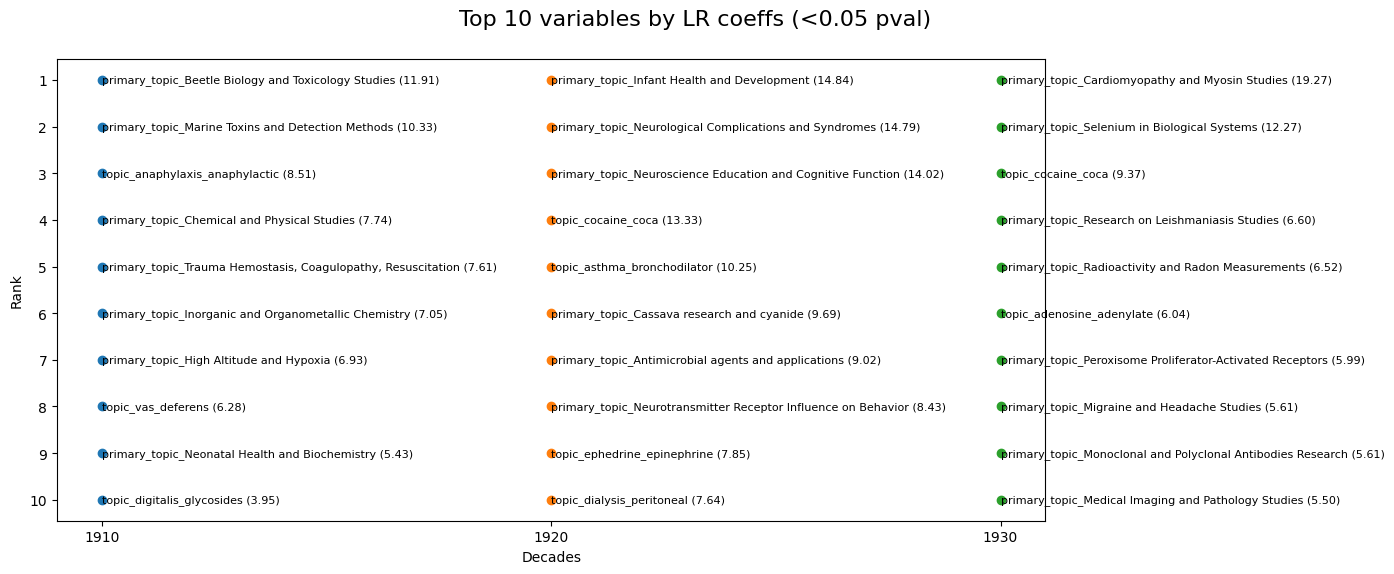

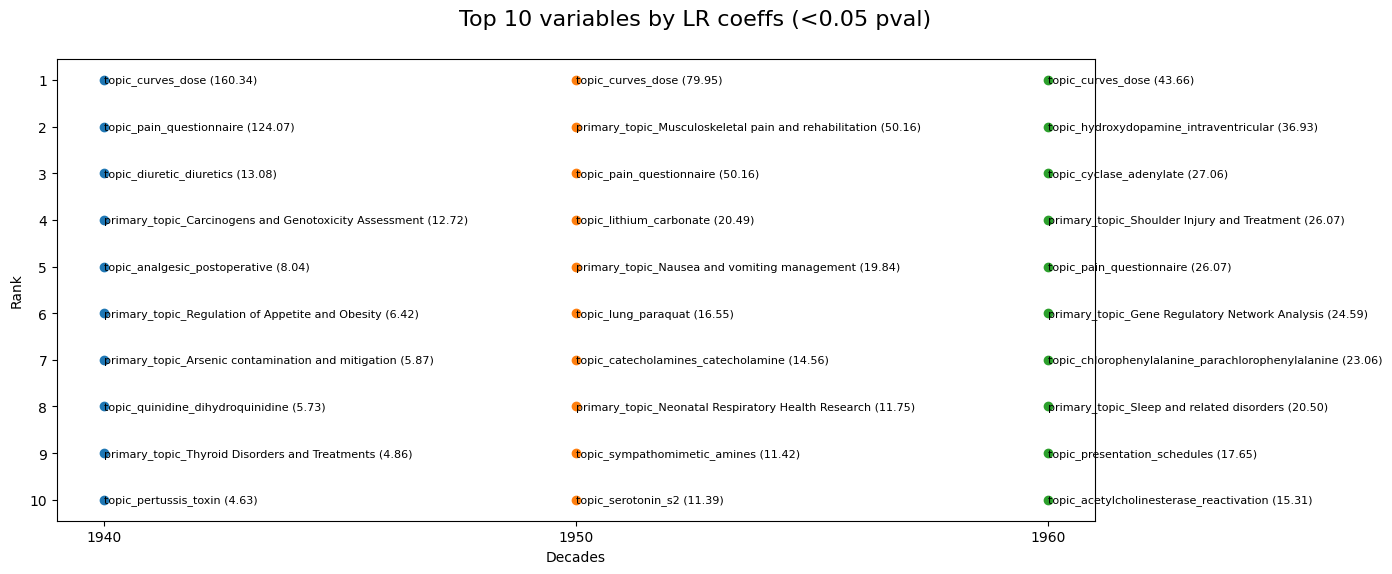

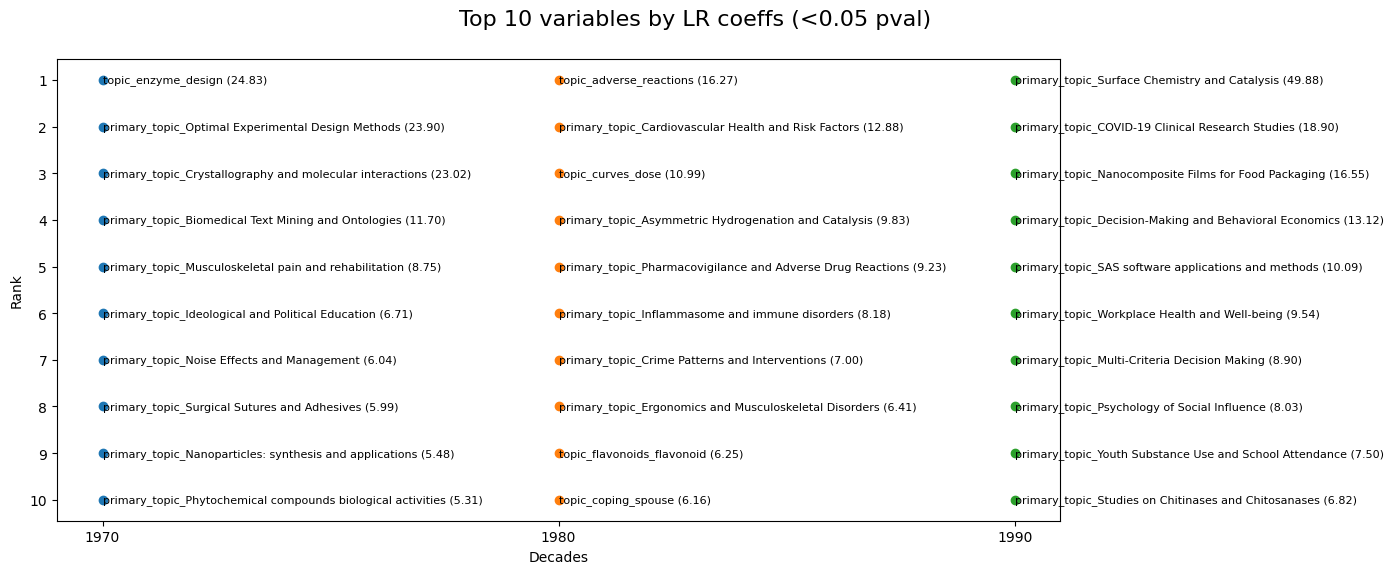

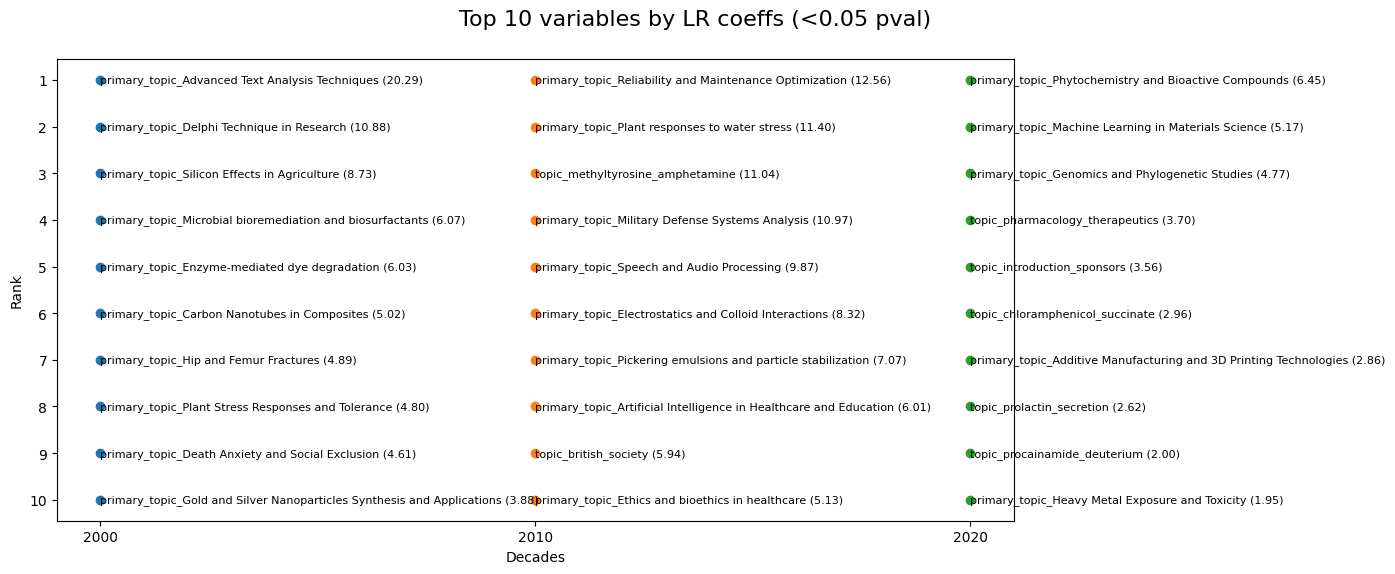

In [ ]:
import matplotlib.pyplot as plt

decades = list(all_top10.keys())
n_decades = len(decades)

chunk_size = 3  

for i in range(0, n_decades, chunk_size):
    start = i
    end = min(i + chunk_size, n_decades)
    subset = decades[start:end]
    

    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle("Top 10 variables by LR coeffs (<0.05 pval)", fontsize=16, y=0.95)
    
    for j, decade in enumerate(subset):
        topics = list(all_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
            coef = all_top10[decade][topic]["coef"]
            label = f"{topic} ({coef:.2f})"
            ax.text(decade, y, label, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


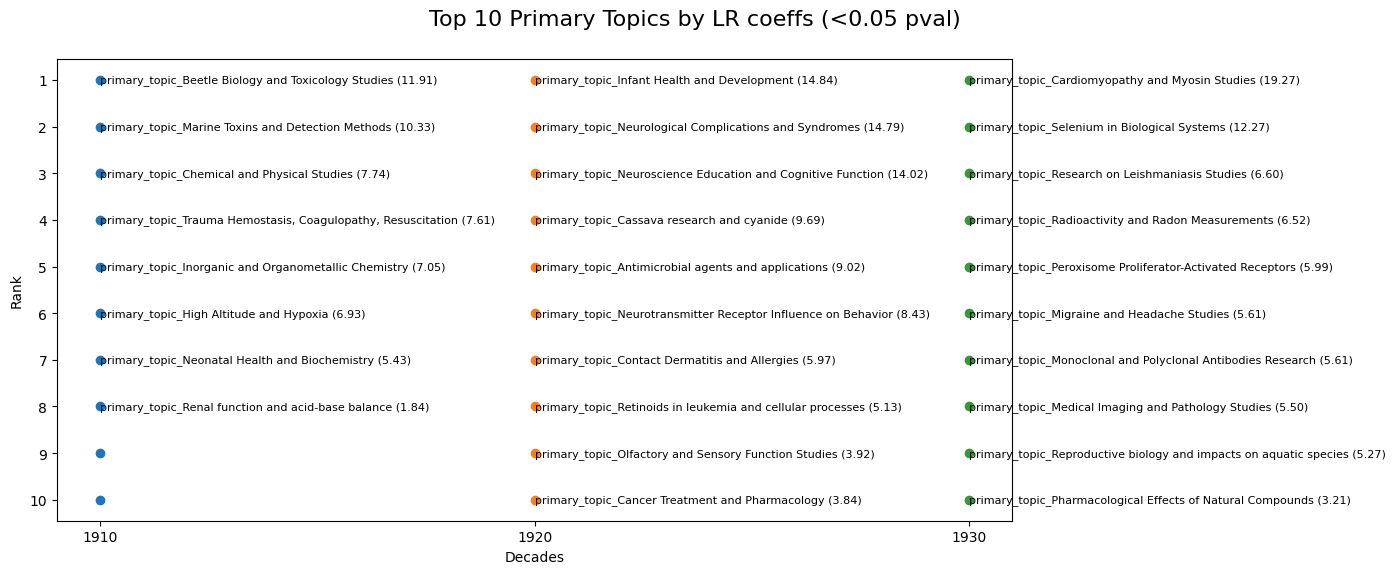

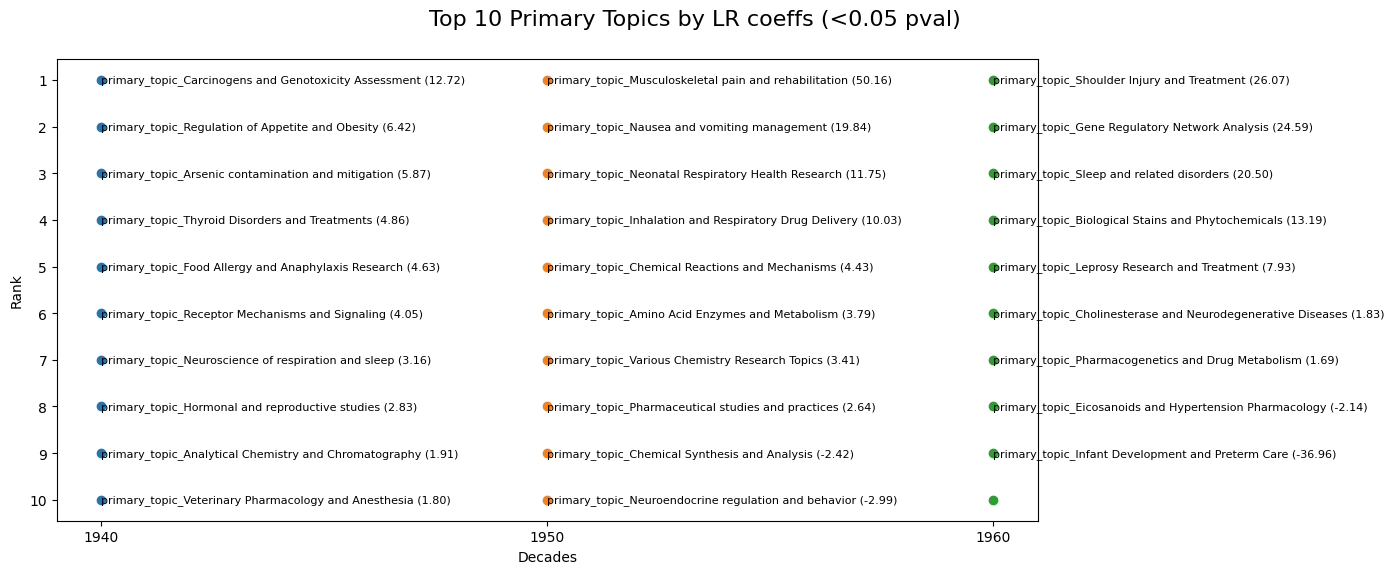

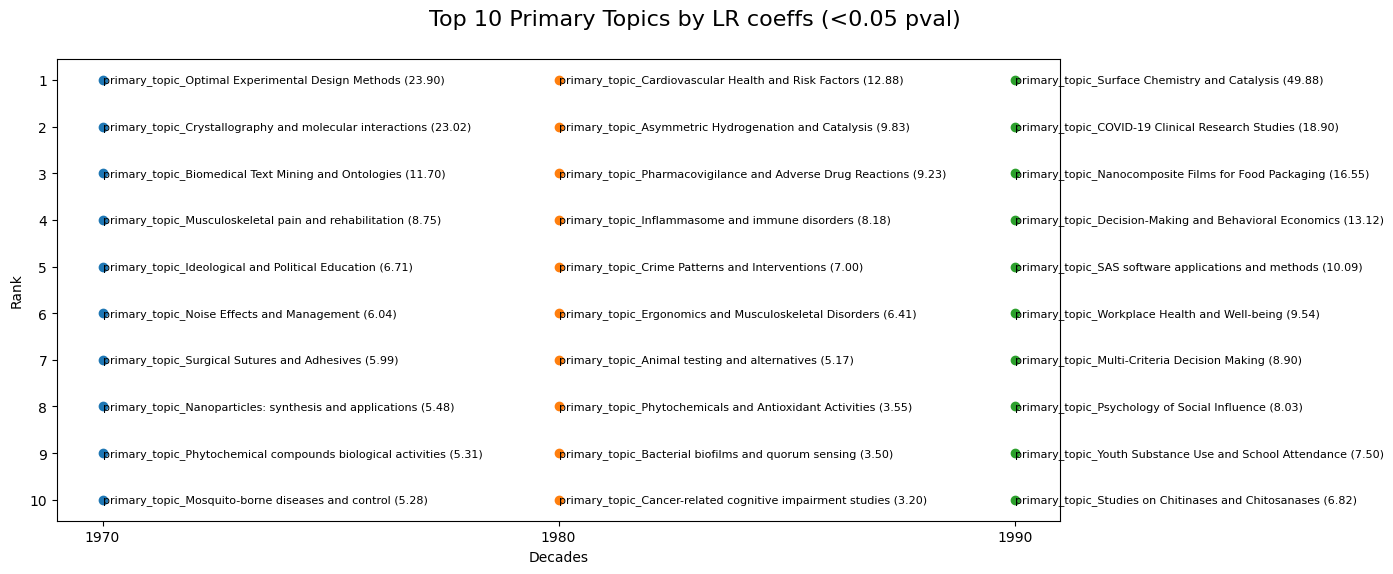

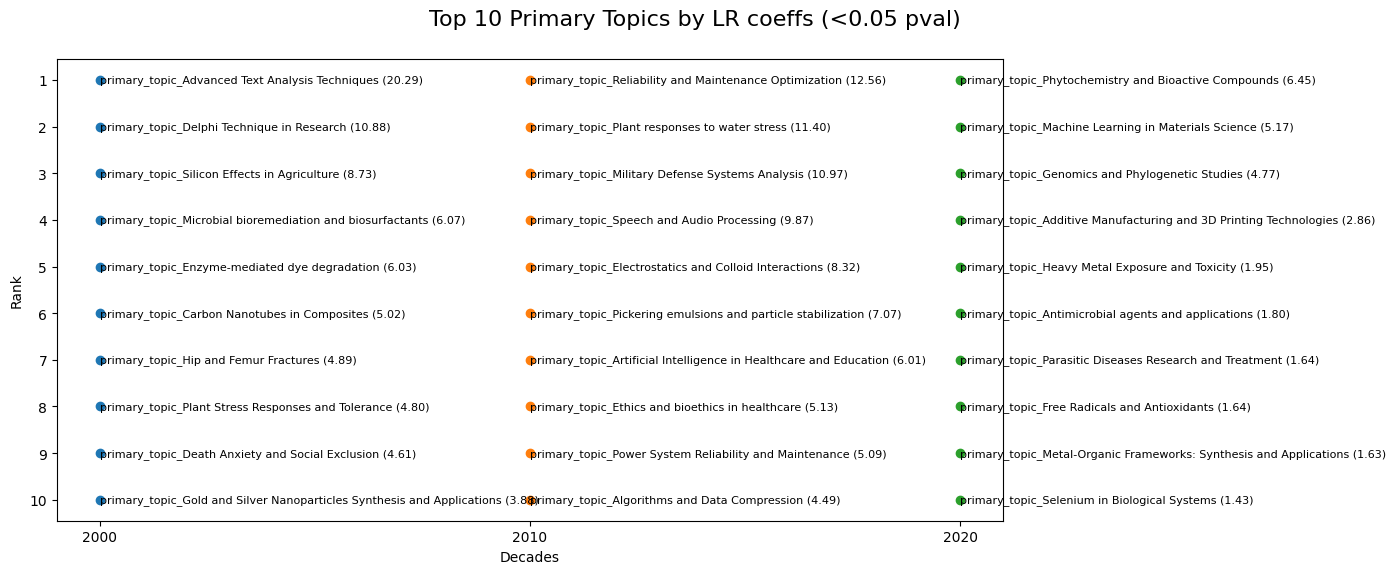

In [ ]:
decades = list(primary_topic_top10.keys())
n_decades = len(decades)

chunk_size = 3  

for i in range(0, n_decades, chunk_size):
    start = i
    end = min(i + chunk_size, n_decades)
    subset = decades[start:end]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle("Top 10 Primary Topics by LR coeffs (<0.05 pval)", fontsize=16, y=0.95)
    
    for j, decade in enumerate(subset):
        topics = list(primary_topic_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
            coef = primary_topic_top10[decade][topic]["coef"]
            label = f"{topic} ({coef:.2f})"
            ax.text(decade, y, label, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


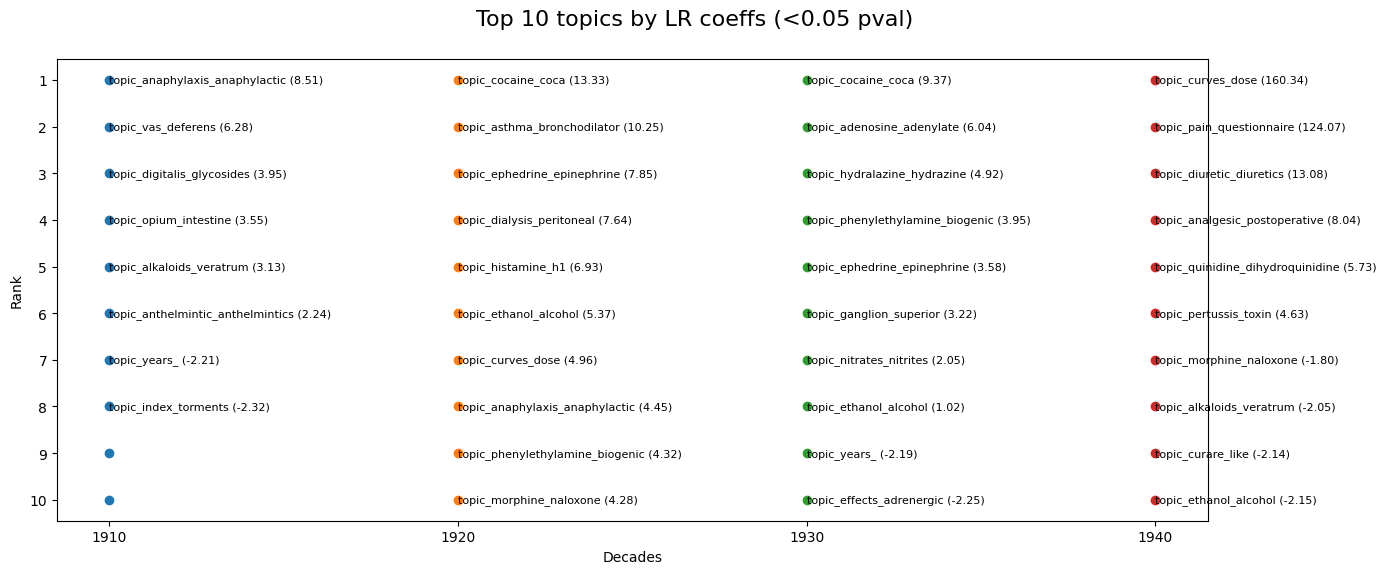

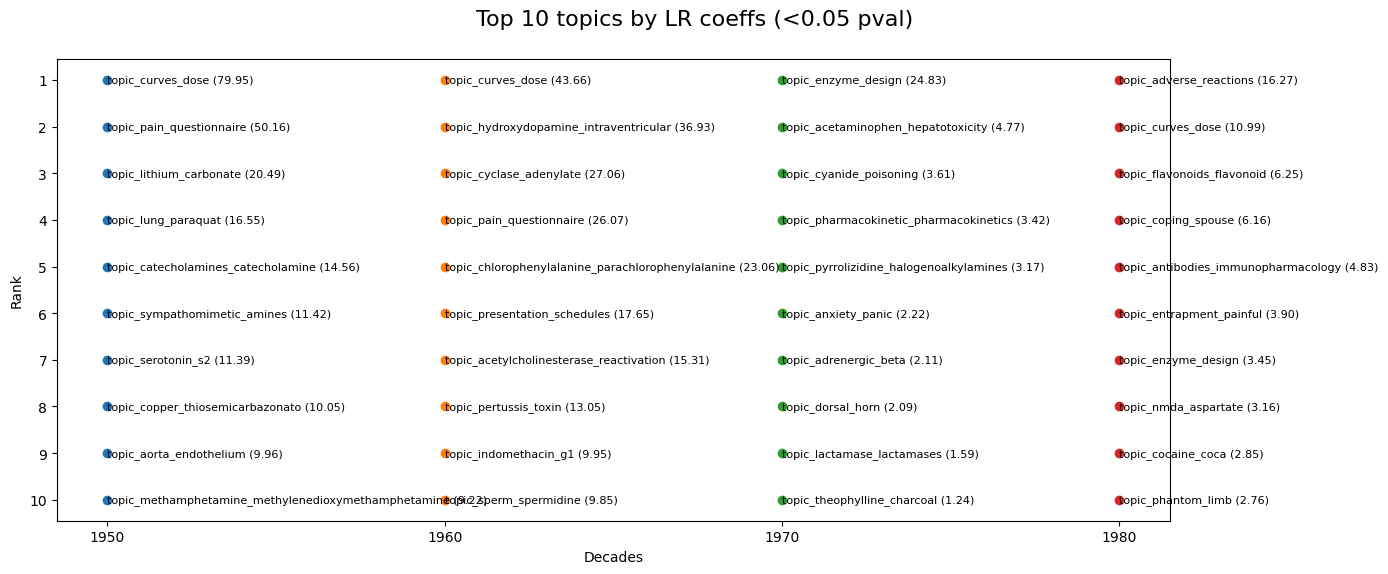

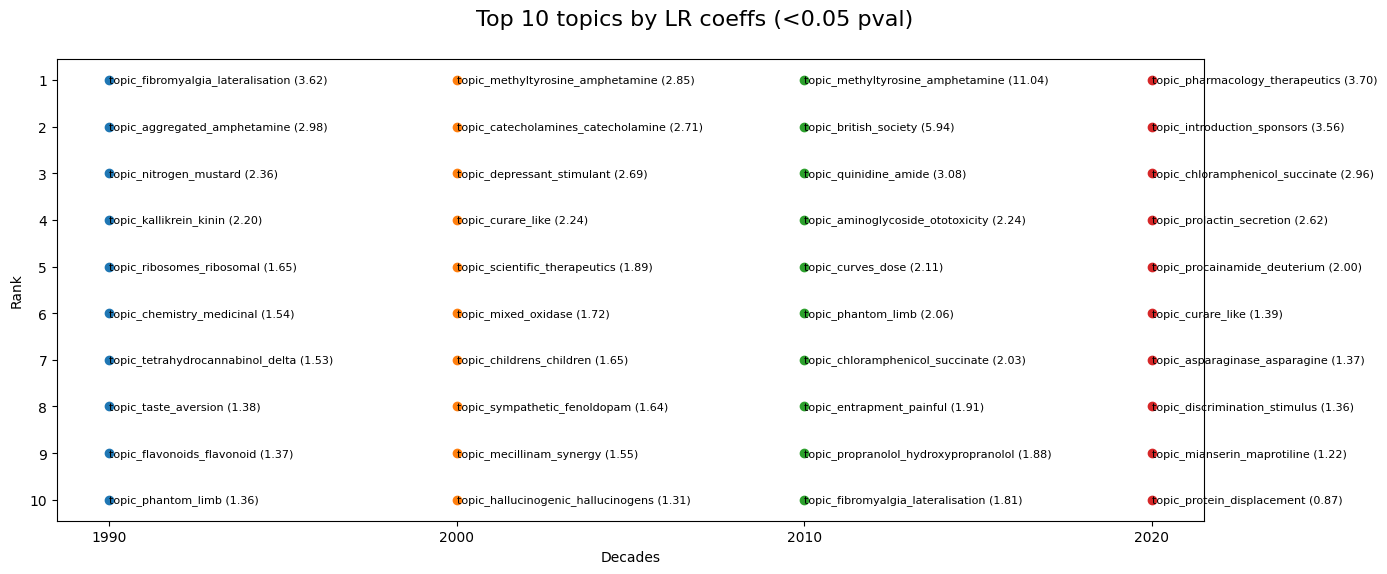

In [ ]:
decades = list(topic_top10.keys())
n_decades = len(decades)

chunk_size = 4  

for i in range(0, n_decades, chunk_size):
    start = i
    end = min(i + chunk_size, n_decades)
    subset = decades[start:end]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle("Top 10 topics by LR coeffs (<0.05 pval)", fontsize=16, y=0.95)
    
    for j, decade in enumerate(subset):
        topics = list(topic_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
            coef = topic_top10[decade][topic]["coef"]
            label = f"{topic} ({coef:.2f})"
            ax.text(decade, y, label, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


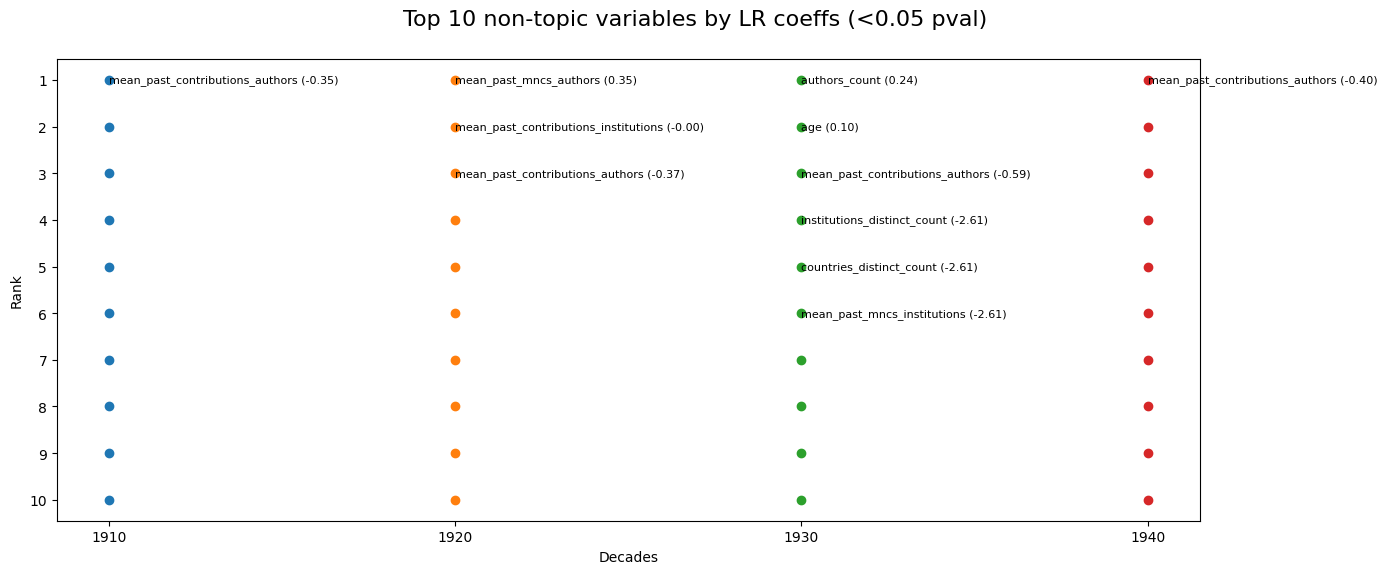

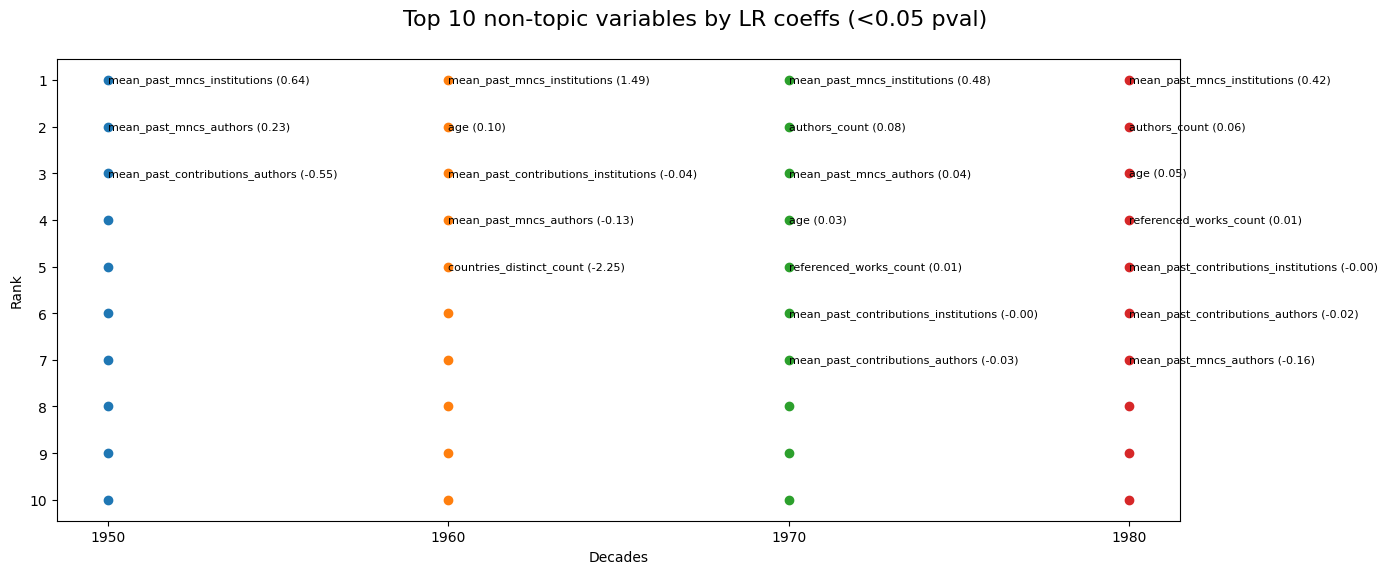

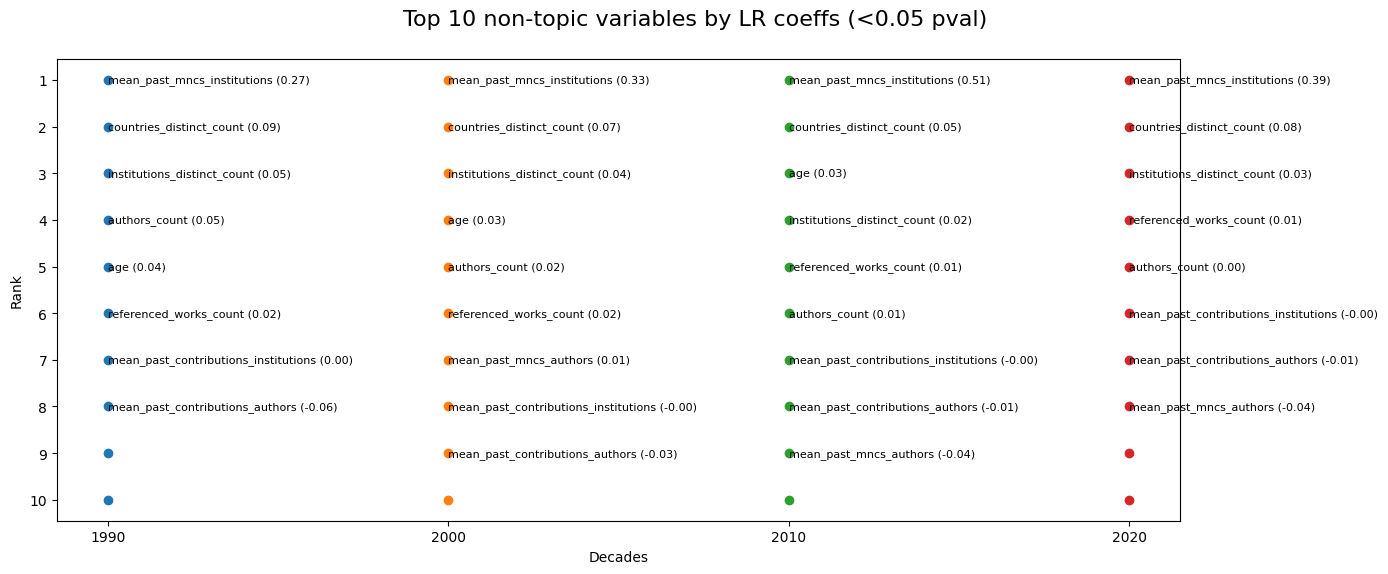

In [ ]:
decades = list(other_top10.keys())
n_decades = len(decades)

chunk_size = 4  

for i in range(0, n_decades, chunk_size):
    start = i
    end = min(i + chunk_size, n_decades)
    subset = decades[start:end]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle("Top 10 non-topic variables by LR coeffs (<0.05 pval)", fontsize=16, y=0.95)
    
    for j, decade in enumerate(subset):
        topics = list(other_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
            coef = other_top10[decade][topic]["coef"]
            label = f"{topic} ({coef:.2f})"
            ax.text(decade, y, label, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Rank")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


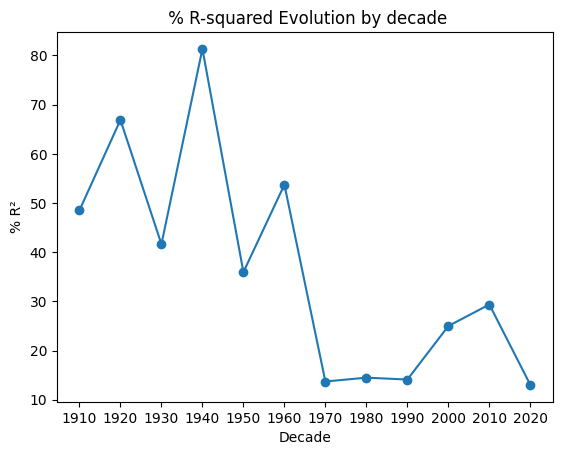

In [75]:
plt.plot(list(lcc_percentiles.keys()), list(lcc_percentiles.values()), marker='o')
plt.xlabel("Decade")
plt.ylabel("% R²")
plt.title(" % R-squared Evolution by decade")
plt.show()